In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import itertools
import warnings

In [2]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)

## Analyse Moyenne-Variance

L'analyse moyenne-variance est une m√©thode de gestion quantitative introduite en 1962 par Harry Markowitz.
Cette m√©thode vise √† minimiser le risque (ou maximiser le rendement ajust√© du risque) par l'utilisation de la diversification et par la r√©solution de programmes d'optimisations sous contraintes pour trouver l'allocation la plus optimale pour chaque niveau de risque. 

En effet, Harry Markowitz a d√©montr√© analytiquement qu'il √©tait possible, par la construction d'un portefeuille diversifi√©, de minimiser le risque pour une esp√©rance de gain √©quivalente √† un portefeuille moins diversifi√©. Cette ensemble de portefeuille constitue la fronti√®re efficiente.

<u> Protocoles </u>:

- Construction d'un portefeuille diversifi√© (actifs faiblement corr√©l√©s entre eux)


- Simulations num√©riques pour g√©n√©rer un tr√®s grand nombre d'allocations diff√©rentes


- Estimations du rendement et de la variance de chacun de ces portefeuilles


- Construction du programme d'optimisation sous contraintes visant √† minimiser le risque ou maximiser le rendement ajust√© du risque (Ratio de Sharpe) tout en respectant les contraintes de gestion et de profil. 


- R√©solution du programme d'optimisation et construction de la fronti√®re efficiente.


- Choisir un portefeuille parmi l'ensemble des portefeuilles contenu dans la fronti√®re efficiente


### Cas n = 2

Dans un premier temps, exposons la th√©orie de Markowitz et de son analyse moyenne-variance dans le cas particulier o√π notre portefeuille contient 2 actifs, A et B.

Concentrons nous tout d'abord sur l'impact de la diversification du portefeuille. Pour rappel, la diversification du portefeuille, dans sa plus simple des formes, est repr√©sent√©e par les coefficients de corr√©lations lin√©aires entre les diff√©rents actifs qui le composent.

Un portefeuille diversifi√© doit √™tre construit de telle sorte que les actifs qui le composent soient faiblement voir n√©gativement corr√©l√©s entre eux ce qui tendrait √† stabiliser la volatilit√© globale du portefeuille. Les actifs n'√©voluent pas dans la m√™me direction ou du moins pas avec la m√™me intensit√©.

Dans la cellule suivante, je vais vous illustrer l'impact de ce coefficient en construisant dans le plan (sigma_p, mu_p) les graphes repr√©sentants l'ensemble des portefeuilles pour un certain coefficient de corr√©lation.

In [3]:
# Param√®tres
mu_a = 0.02  # Moyenne des rendements de l'actif A
mu_b = 0.05  # Moyenne des rendements de l'actif B
sigma_a = 0.10  # √âcart-type des rendements de l'actif A
sigma_b = 0.20  # √âcart-type des rendements de l'actif B
w_a = np.linspace(0, 1, 100) # Liste des poids appliqu√©s √† l'actif A
w_b = 1 - w_a # Liste des poids appliqu√©s √† l'actif B

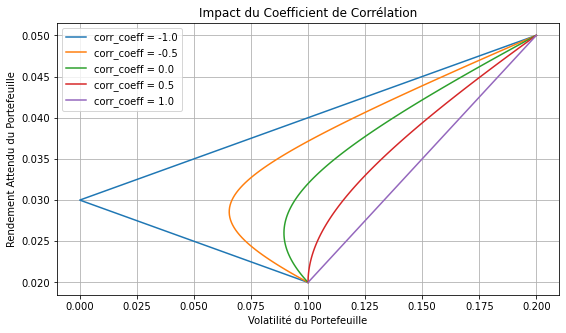

In [4]:
# Trac√© des figures
plt.figure(figsize=(9, 5))
for corr_coeff in np.linspace(-1, 1, 5):
    mu_p = w_a * mu_a + w_b * mu_b
    sigma_p = np.sqrt((w_a * sigma_a)**2 + (w_b * sigma_b)**2 + 2 * w_a * w_b * corr_coeff * sigma_a * sigma_b)
    plt.plot(sigma_p, mu_p, label=f"corr_coeff = {corr_coeff}")

plt.xlabel('Volatilit√© du Portefeuille')
plt.ylabel('Rendement Attendu du Portefeuille')
plt.title('Impact du Coefficient de Corr√©lation')
plt.legend()
plt.grid(True)
plt.show()

### Conclusions graphiques et th√©oriques

Ainsi, nous observons nettement que plus le coefficient de corr√©lation entre les deux actifs est bas plus le niveau de risque pour un m√™me rendement l'est aussi. 

Markowitz a ainsi d√©montr√© l'int√©r√™t fondamental de la diversification dans l'investissement en expliquant que si nous prenons deux portefeuilles diff√©rents par les actifs qui les composent et par leurs corr√©lations lin√©aires entre eux, mais similaires par les performances et les niveaux de risques individuels, alors le portefeuille pr√©sentant les actifs les moins corr√©l√©s entre eux saura moins risqu√© pour un m√™me niveau de rendement.

La diversification ne vise pas √† maximiser le rendement mais √† minimiser le risque pour un m√™me niveau de rendement.
Math√©matiquement, on dira que l'esperance de rendement n'est pas fonction du coeff de corr√©lation.

$$
\mu_P = w_A \cdot \mu_A + w_B \cdot \mu_B
$$


Analysons d√©sormais plus en profondeur les cas pour des valeurs particuli√®res du coefficient de corr√©lation.

- Cas corr_coef = 1

$$
\sigma^2_p = w_A^2 \cdot \sigma_A^2 + w_B^2 \cdot \sigma_B^2 + 2 \cdot w_A \cdot w_B \cdot \sigma_A \cdot \sigma_B
$$

Graphiquement pour ce cas, nous observons que les deux actifs sont r√©li√©s par un segment de droite. Cette progession lin√©aire s'explique par le fait que pour un coeff √©gal √† 1. La rentabilit√© esp√©r√©e et le risque du portefeuille sont des moyennes pond√©r√©es resp. de la rentabilit√© esp√©r√©es et du risque des deux titres.

Dans ce cas de figure, il est clair qu'il est impossible d'obtenir un niveau de risque inf√©rieur √† celui de l'actif le moins risqu√©. 

- Cas -1 < corr_coef < 1

Pour rappel, P est un portefeuille compos√© d'un actif A et d'un actif B.
Notons x et (1-x) leur poids respectif dans le portefeuille.

Determinons dans ces cas, le poids de variance minimale qui correspond √† la d√©riv√©e premi√®re de la variance du portefeuille par rapport.

$$
\sigma^2_p = x^2 \cdot \sigma^2_A + (1 - x)^2 \cdot \sigma^2_B + 2 \cdot x \cdot (1 - x) \cdot \rho \cdot \sigma_A \cdot \sigma_B
$$

$$
\frac{d}{dx} (\sigma^2_p) = x \cdot \sigma^2_A - (1 - x) \cdot \sigma^2_B + (1 - 2x) \cdot \rho \cdot \sigma_A \cdot \sigma_B = 0
$$

$$
x* = \frac{\sigma^2_B - \rho \cdot \sigma_A \cdot \sigma_B}{(\sigma^2_A + \sigma^2_B - \rho \cdot \sigma_A \cdot \sigma_B)}
$$

Ainsi, pour ce portefeuille nous avons la variance suivante:

$$
\sigma^2_p = \frac{\sigma^2_A \sigma^2_B (1 - \rho^2)}{\sigma^2_A + \sigma^2_B - 2 \rho \sigma_A \sigma_B}
$$

En supposant que l'actif A est l'actif avec la variance la plus faible et donc le moins risqu√©, calculons le delta de risque entre ces deux grandeurs.

$$
\delta = - \frac{\sigma^2_A (\sigma_A - \rho \sigma_B)^2}{\sigma^2_A + \sigma^2_B - 2 \rho {\sigma_A \sigma_B}} 
$$

Ainsi on comprend que si le coefficient n'est pas √©gal au rapport des √©carts type avec au num√©rateur l'√©cart type de l'actif A (le moins risqu√©), le rendement du portefeuille sera toujours inf√©rieur √† celui de l'actif le moins risqu√©.

Ce que l'on peut aussi en d√©duire vis √† vis de la valeur de x* est que si le coefficient de corr√©lation est sup√©rieur √† ce rapport alors la valeur du poids sera positive, sinon elle sera n√©gative et on sera dans le cadre d'une vente √† d√©couvert sur l'actif A et d'un achat √† effet de levier sur l'actif B.

En revanche, si le coefficient de corr√©lation est √©gal √† ce rapport alors le niveau de risque du portefeuille sera √©gal √† celui de l'actif le moins risqu√©. Seul cas o√π la diversification ne joue pas (Cf. courbe --> corr_coef = 0.5).

- Cas corr_coef = -1

Seul cas o√π le niveau de risque minimal est nul, pour une certain allocation.

<u>Conclusion</u>:

Si nous devons retenir une chose c'est que la diversification joue son r√¥le de minimiseur de risque √† partir du moment o√π le coefficient de corr√©lation est inf√©rieur √† 1 et diff√©rent du rapport des deux ecart types (moins risqu√© au num√©rateur).

 ---- Caract√®ristique Portefeuille Minimum Variance pour rho = -1.0 ---- 
Ponderation actif A 0.6667
Pond√©ration actif B 0.3333
Rendement du portefeuille 0.03
Volatilit√© du portefeuille 0.0


 ---- Caract√®ristique Portefeuille Minimum Variance pour rho = -0.5 ---- 
Ponderation actif A 0.7143
Pond√©ration actif B 0.2857
Rendement du portefeuille 0.0286
Volatilit√© du portefeuille 0.0655


 ---- Caract√®ristique Portefeuille Minimum Variance pour rho = 0.0 ---- 
Ponderation actif A 0.8
Pond√©ration actif B 0.2
Rendement du portefeuille 0.026
Volatilit√© du portefeuille 0.0894


 ---- Caract√®ristique Portefeuille Minimum Variance pour rho = 0.5 ---- 
Ponderation actif A 1.0
Pond√©ration actif B 0.0
Rendement du portefeuille 0.02
Volatilit√© du portefeuille 0.1


 ---- Caract√®ristique Portefeuille Minimum Variance pour rho = 1.0 ---- 
Ponderation actif A 2.0
Pond√©ration actif B -1.0
Rendement du portefeuille -0.01
Volatilit√© du portefeuille 0.0




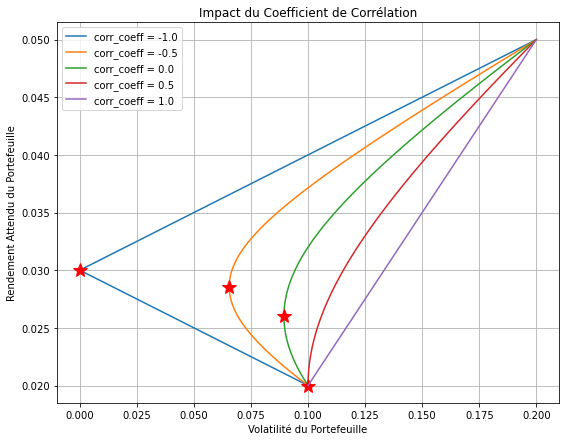

In [5]:
# Trac√©s des figures avec en plus les portefeuilles de variance minimale
plt.figure(figsize=(9, 7))
for corr_coeff in np.linspace(-1, 1, 5):
    mu_p = w_a * mu_a + w_b * mu_b
    sigma_p = np.sqrt(w_a**2 * sigma_a**2 + w_b**2 * sigma_b**2 + 2 * w_a * w_b * corr_coeff * sigma_a * sigma_b)
    # Reporting
    x = (sigma_b**2 - corr_coeff * sigma_a * sigma_b) / (sigma_a**2 + sigma_b**2 - 2 * corr_coeff * sigma_a * sigma_b)
    mu_p_var_min = x * mu_a + (1-x) * mu_b
    sigma_p_min = np.sqrt(x**2 * sigma_a**2 + (1 - x)**2 * sigma_b**2 + 2 * x * (1 - x) * corr_coeff * sigma_a * sigma_b)
    print(f" ---- Caract√®ristique Portefeuille Minimum Variance pour rho = {corr_coeff} ---- ")
    print("Ponderation actif A", round(x, 4))
    print("Pond√©ration actif B", round(1-x, 4))
    print("Rendement du portefeuille", round(mu_p_var_min, 4))
    print("Volatilit√© du portefeuille", round(sigma_p_min, 4))
    print("\n")
    # Trac√©s
    plt.plot(sigma_p, mu_p, label=f"corr_coeff = {corr_coeff}")
    if corr_coeff == 1.0: # Cas vente √† d√©couvert
        continue
    plt.plot(sigma_p_min, mu_p_var_min, color="red", marker="*", markersize=15)

    
plt.xlabel('Volatilit√© du Portefeuille')
plt.ylabel('Rendement Attendu du Portefeuille')
plt.title('Impact du Coefficient de Corr√©lation')
plt.legend()
plt.grid(True)
plt.show()

### Selection d'un portefeuille Equity US diversifi√©

Pour la suite de l'exploration, nous g√©n√©raliserons notre √©tude √† N actifs et pour illustrer chacune de mes prochaines d√©monstrations nous aurons besoin d'un portefeuille diversifi√© au sens de Markowitz.

Pour ce faire, j'ai r√©cup√©r√© d'internet un fichier excel contenant pletor de tickers Yahoo cat√©goris√©s par secteurs et place boursi√®re. Cependant, le csv n'a pas √©t√© maintenu depuis 2017 et il y aura sans doute des tickers obsol√©tes (suspension de cotation, fusion/acquisition, liquidation, ...) et/ou des tickers absents (IPO r√©cents).

Cet excel me permettra de boucler sur les tickers et d'automatiser l'extraction des donn√©es de prix via la biblioth√®que yfinance.

In [6]:
def tickers_returns_dataframe(start, end, benchmark_tickers=["^GSPC"], depth=10, countries=["USA"], sectors=[]):
    
    # R√©cup√©ration des donn√©es excel
    tickers_data = pd.read_excel("Ressources/tickers.xlsx", sheet_name="Stock")
    tickers_data_usa = tickers_data[tickers_data["Country"].isin(countries)].dropna()
    if sectors != []:
        tickers_data_usa = tickers_data[tickers_data["Category Name"].isin(sectors)]
    
    # Construction du DataFrame
    df, ix, stop_r = pd.DataFrame(), 0, 0
    delisted_tickers = []
    no_matching_tickers = []
    for ticker, company in zip(tickers_data_usa.Ticker, tickers_data_usa.Name):
        data = yf.Ticker(ticker).history(start=start)
        data.index = pd.to_datetime(data.index).strftime('%d-%m-%Y')
        # Handle yf exception for delisted tickers
        try:  
            error_message = yf.shared._ERRORS[ticker]
            delisted_tickers.append((ticker, company))
            continue
        except Exception as e:
            # Dates de cotations similaires
            if stop_r == 0:
                date_range = data.index
                stop_r = 1
            elif stop_r == 1 and (not np.array_equal(data.index, date_range)):
                no_matching_tickers.append([ticker, company])
                continue
            # Conditions sur les volumes et les prix (pour √©viter les penny stocks et les actions peu liquides)
            n = len(data)
            if (data["Volume"].sum() < n*10e6 and data["Close"].sum() < n*10) or len(data) == 0:
                continue
            #Get daily returns for each stock
            data = data.Close.pct_change().dropna()
            # Set the dataFame
            if ix == 0:
                df[ticker] = data
            # Complete the DataFrame
            else:
                df = pd.merge(df, data, left_index=True, right_index=True)
                df.columns = list(df.columns[:-1]) + [ticker]
            # Depth of our portfolio
            ix += 1
            if ix == depth:
                break
    for benchmark_ticker in benchmark_tickers:
        benchmark = yf.Ticker(benchmark_ticker).history(start=start, end=end).Close.pct_change().dropna()
        benchmark.index = pd.to_datetime(benchmark.index).strftime('%d-%m-%Y')
        df = pd.merge(df, benchmark, left_index=True, right_index=True)
        df.columns = list(df.columns[:-1]) + [benchmark_ticker]
    return df, delisted_tickers, no_matching_tickers

In [7]:
start = "2023-03-01"
end = "2023-08-01"
raw_df, delisted_tickers, no_matching_tickers = tickers_returns_dataframe(start, end, depth=250)

Got error from yahoo api for ticker AGN, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- AGN: No timezone found, symbol may be delisted
Got error from yahoo api for ticker APC, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- APC: No timezone found, symbol may be delisted
ABX: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker ARNA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ARNA: No timezone found, symbol may be delisted
AET: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker ALXN, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ALXN: No timezone found, symbol may be delisted
Got error from yahoo api for ticker AKS, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- AKS: No timezone found, symbol may be deli

Got error from yahoo api for ticker ATAX, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ATAX: No timezone found, symbol may be delisted
Got error from yahoo api for ticker ANH, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ANH: No timezone found, symbol may be delisted
Got error from yahoo api for ticker PETX, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- PETX: No timezone found, symbol may be delisted
Got error from yahoo api for ticker NAO, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- NAO: No timezone found, symbol may be delisted
Got error from yahoo api for ticker ASNA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ASNA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker AQXP, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be del

In [8]:
delisted_tickers[:10]

[('AGN', 'Allergan plc'),
 ('APC', 'Anadarko Petroleum Corporation'),
 ('ABX', 'Barrick Gold Corporation'),
 ('ARNA', 'Arena Pharmaceuticals, Inc.'),
 ('AET', 'Aetna Inc.'),
 ('ALXN', 'Alexion Pharmaceuticals, Inc.'),
 ('AKS', 'AK Steel Holding Corporation'),
 ('CS', 'Credit Suisse Group AG'),
 ('AVP', 'Avon Products, Inc.'),
 ('ANTM', 'Anthem, Inc.')]

In [9]:
raw_df.head()

AAPL       BAC      AMZN         T      GOOG        MO  \
Date                                                                     
02-03-2023  0.004129 -0.012677 -0.000434  0.000000  0.019887  0.006717   
03-03-2023  0.035090  0.020006  0.030066  0.008039  0.018525  0.001507   
06-03-2023  0.018539 -0.002049 -0.012118 -0.002126  0.016592  0.014184   
07-03-2023 -0.014496 -0.031974 -0.002133 -0.003197 -0.014752 -0.013562   
08-03-2023  0.008377 -0.013333  0.003955 -0.005345  0.005097  0.005371   

                 DAL        AA       AXP        DD  ...      APPF      ALLE  \
Date                                                ...                       
02-03-2023 -0.002337  0.039497 -0.003240  0.016832  ... -0.000694  0.000890   
03-03-2023  0.011192  0.034085  0.021387 -0.003471  ... -0.000540  0.019998   
06-03-2023 -0.010039 -0.031216 -0.000168 -0.024782  ...  0.012733 -0.002876   
07-03-2023  0.015861 -0.065562 -0.020887 -0.022940  ... -0.033300 -0.009176   
08-03-2023  0.016893  0.016942 -0.002795  0.013637  ...  0.006858  0.008555   

                 AHH       AGM       NOA       DIT      CRMT      ATEN  \
Date                                                                     
02-03-2023  0.003894  0.000482  0.017370  0.003127 -0.044503  0.004633   
03-03-2023  0.001552  0.016260  0.019164  0.020172  0.047653 -0.006588   
06-03-2023 -0.005422 -0.002034  0.019373 -0.070617 -0.036686 -0.010610   
07-03-2023 -0.025701 -0.026019 -0.026272  0.071579  0.006406 -0.001340   
08-03-2023  0.011990 -0.002999  0.002870 -0.019391 -0.003419  0.014765   

                APPS     ^GSPC  
Date                            
02-03-2023 -0.009208  0.007582  
03-03-2023  0.028810  0.016148  
06-03-2023 -0.029810  0.000687  
07-03-2023 -0.028864 -0.015327  
08-03-2023  0.011505  0.001415  

[5 rows x 251 columns]

In [10]:
# R√©cup√©rons les actions dont les rendements peuvent √™tre consid√©r√©s comme normalement distribu√©
# Shapiro Wilk Test
from scipy.stats import shapiro

def filtre_test_shapiro_wilk(df, alpha):
    for stock in df.columns:
        stat, p = shapiro(df[stock])
        if p <= alpha:
            df = df.drop(stock, axis=1)
    return df

df = filtre_test_shapiro_wilk(raw_df, 0.01)
df.head()

/Users/ayoub/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


BAC      AMZN      GOOG        MO       DAL        AA  \
Date                                                                     
02-03-2023 -0.012677 -0.000434  0.019887  0.006717 -0.002337  0.039497   
03-03-2023  0.020006  0.030066  0.018525  0.001507  0.011192  0.034085   
06-03-2023 -0.002049 -0.012118  0.016592  0.014184 -0.010039 -0.031216   
07-03-2023 -0.031974 -0.002133 -0.014752 -0.013562  0.015861 -0.065562   
08-03-2023 -0.013333  0.003955  0.005097  0.005371  0.016893  0.016942   

                 AXP      AMAT      AMGN       ALL  ...      KALU      HOMB  \
Date                                                ...                       
02-03-2023 -0.003240  0.010148 -0.006139 -0.010422  ...  0.017675 -0.012762   
03-03-2023  0.021387  0.004306  0.000298  0.014650  ...  0.017127  0.010008   
06-03-2023 -0.000168 -0.003531  0.001278 -0.004136  ... -0.042689 -0.010322   
07-03-2023 -0.020887 -0.018306 -0.027179 -0.023668  ... -0.014988 -0.026283   
08-03-2023 -0.002795  0.019593 -0.001268 -0.017499  ... -0.020875 -0.009426   

                 FAF      ATLC       AFG       AHH       AGM       DIT  \
Date                                                                     
02-03-2023 -0.024861 -0.020763 -0.014722  0.003894  0.000482  0.003127   
03-03-2023  0.001467  0.013720 -0.012712  0.001552  0.016260  0.020172   
06-03-2023 -0.009341 -0.065518 -0.006852 -0.005422 -0.002034 -0.070617   
07-03-2023 -0.005227 -0.006254 -0.027217 -0.025701 -0.026019  0.071579   
08-03-2023  0.015950  0.002981 -0.008573  0.011990 -0.002999 -0.019391   

                ATEN     ^GSPC  
Date                            
02-03-2023  0.004633  0.007582  
03-03-2023 -0.006588  0.016148  
06-03-2023 -0.010610  0.000687  
07-03-2023 -0.001340 -0.015327  
08-03-2023  0.014765  0.001415  

[5 rows x 122 columns]

In [11]:
# Matrice de correlation
corr_matrix = df.corr()
corr_matrix

BAC      AMZN      GOOG        MO       DAL        AA       AXP  \
BAC    1.000000  0.140130  0.114972  0.396325  0.578094  0.520720  0.637235   
AMZN   0.140130  1.000000  0.545426 -0.087632  0.144938  0.219283  0.305885   
GOOG   0.114972  0.545426  1.000000 -0.126500 -0.024563  0.156662  0.216915   
MO     0.396325 -0.087632 -0.126500  1.000000  0.274133  0.329750  0.279360   
DAL    0.578094  0.144938 -0.024563  0.274133  1.000000  0.541575  0.559890   
...         ...       ...       ...       ...       ...       ...       ...   
AHH    0.484490  0.071790  0.035036  0.428230  0.388425  0.483519  0.462237   
AGM    0.660000  0.300643  0.233030  0.296106  0.447679  0.539870  0.636675   
DIT   -0.033585 -0.135418 -0.055368 -0.204524  0.000174 -0.088901 -0.106436   
ATEN   0.239701  0.191923  0.215615  0.050574  0.231471  0.360496  0.221317   
^GSPC  0.595079  0.531278  0.502984  0.329337  0.529311  0.668063  0.688618   

           AMAT      AMGN       ALL  ...      KALU      HOMB       FAF  \
BAC    0.167761  0.135450  0.543703  ...  0.540085  0.676319  0.424235   
AMZN   0.335791 -0.021771 -0.028365  ...  0.254718  0.273519  0.058466   
GOOG   0.286756  0.038517 -0.028539  ...  0.158130  0.222026 -0.018371   
MO    -0.054382  0.198221  0.448175  ...  0.321706  0.296389  0.390003   
DAL    0.269579 -0.016059  0.387180  ...  0.477269  0.424001  0.301681   
...         ...       ...       ...  ...       ...       ...       ...   
AHH    0.171006  0.285901  0.405329  ...  0.588245  0.544256  0.445034   
AGM    0.270141  0.160305  0.481215  ...  0.525544  0.649005  0.328527   
DIT   -0.034107  0.171860 -0.033562  ... -0.057306 -0.001095 -0.128356   
ATEN   0.342951  0.123402  0.078516  ...  0.268511  0.315398  0.379527   
^GSPC  0.500620  0.270560  0.375914  ...  0.621922  0.570334  0.401668   

           ATLC       AFG       AHH       AGM       DIT      ATEN     ^GSPC  
BAC    0.501687  0.602498  0.484490  0.660000 -0.033585  0.239701  0.595079  
AMZN   0.252047  0.097783  0.071790  0.300643 -0.135418  0.191923  0.531278  
GOOG   0.160002  0.106185  0.035036  0.233030 -0.055368  0.215615  0.502984  
MO     0.205045  0.456407  0.428230  0.296106 -0.204524  0.050574  0.329337  
DAL    0.440451  0.450742  0.388425  0.447679  0.000174  0.231471  0.529311  
...         ...       ...       ...       ...       ...       ...       ...  
AHH    0.482791  0.467963  1.000000  0.528221 -0.156829  0.221392  0.574921  
AGM    0.520605  0.639043  0.528221  1.000000 -0.036445  0.228082  0.644589  
DIT   -0.029575 -0.128938 -0.156829 -0.036445  1.000000  0.022881 -0.088719  
ATEN   0.368838  0.306350  0.221392  0.228082  0.022881  1.000000  0.400305  
^GSPC  0.524022  0.568414  0.574921  0.644589 -0.088719  0.400305  1.000000  

[122 rows x 122 columns]

In [12]:
# Toutes les combinaisons possible de portefeuille
number_of_stocks = 3
stocks = corr_matrix.columns
combinaisons = list(itertools.combinations(stocks, number_of_stocks))
print(len(combinaisons))

295240


In [13]:
# Selection des combinaisons dont les matrices de corr√©lations ont leurs coefficients non diagonaux cap√©s par un seuil que je fixe
corr_div, corr_non_div = 0., 0.8
portefeuilles_faibles_corr = []
portefeuilles_tres_corr = []
for combinaison in combinaisons:
    combinaison = list(combinaison)
    sub_matrix = corr_matrix.loc[combinaison, combinaison]
    if (sub_matrix.values[~pd.DataFrame(np.eye(len(sub_matrix), dtype=bool)).values] < corr_div).all():
        portefeuilles_faibles_corr.append(combinaison)
    elif (sub_matrix.values[~pd.DataFrame(np.eye(len(sub_matrix), dtype=bool)).values] > corr_non_div).all():
        portefeuilles_tres_corr.append(combinaison)
    if len(portefeuilles_faibles_corr) >= 1 and len(portefeuilles_tres_corr) >= 1:
        break
print("Portefeuille faiblement corr√©l√©:", portefeuilles_faibles_corr)
print("Portefeuille tr√®s corr√©l√©:", portefeuilles_tres_corr)

Portefeuille faiblement corr√©l√©: [['AMZN', 'MO', 'DIT'], ['AMZN', 'ALL', 'DIT'], ['AMZN', 'ADM', 'DIT'], ['AMZN', 'AEP', 'DIT'], ['AMZN', 'AEE', 'ASC'], ['AMZN', 'AR', 'DIT'], ['GOOG', 'MO', 'AGI'], ['GOOG', 'MO', 'DIT'], ['GOOG', 'DAL', 'AEP'], ['GOOG', 'DAL', 'AEE'], ['GOOG', 'DAL', 'AGI'], ['GOOG', 'ALL', 'AGI'], ['GOOG', 'ALL', 'DIT'], ['GOOG', 'AEP', 'JBLU'], ['GOOG', 'AEP', 'PAG'], ['GOOG', 'AEP', 'AGCO'], ['GOOG', 'AEP', 'DIT'], ['GOOG', 'JBLU', 'AEE'], ['GOOG', 'JBLU', 'AGI'], ['GOOG', 'JBLU', 'DIT'], ['GOOG', 'AEE', 'PAG'], ['GOOG', 'ARLP', 'AGI'], ['GOOG', 'ARLP', 'DIT'], ['GOOG', 'LH', 'DIT'], ['GOOG', 'AR', 'AGI'], ['GOOG', 'AR', 'DIT'], ['GOOG', 'RBA', 'AGI'], ['GOOG', 'RBA', 'DIT'], ['GOOG', 'AIR', 'AGI'], ['GOOG', 'AIR', 'DIT'], ['GOOG', 'AMCX', 'AGI'], ['GOOG', 'ALEX', 'AGI'], ['GOOG', 'ALEX', 'DIT'], ['GOOG', 'PAG', 'AGI'], ['GOOG', 'PAG', 'DIT'], ['GOOG', 'AGCO', 'AGI'], ['GOOG', 'AGCO', 'DIT'], ['GOOG', 'AGI', 'AXS'], ['GOOG', 'AGI', 'ALGT'], ['GOOG', 'AGI', 'AIT']

#### Verification des portefeuilles

In [14]:
tickers_div = portefeuilles_faibles_corr[-1]
raw_df[tickers_div].corr()

AEP      JBLU       DIT
AEP   1.000000 -0.045065 -0.079838
JBLU -0.045065  1.000000 -0.060229
DIT  -0.079838 -0.060229  1.000000

In [15]:
tickers_non_div = portefeuilles_tres_corr[-1]
raw_df[tickers_non_div].corr()

AEP       AEE       LNT
AEP  1.000000  0.873713  0.905636
AEE  0.873713  1.000000  0.912265
LNT  0.905636  0.912265  1.000000

Ici, je voulais d√©terminer empiriquement √† quel point je pouvais diversifier mon portefeuille en restreignant mon univers d'investissement aux big et mega cap americaines.

En effet, restreindre notre univers d'investissement √† une seule classe d'actif (actions) aux tailles comparables (big et mega caps) et √©chang√©s dans une m√™me zone g√©ographique nous empeche de profiter pleinement des bienfaits de la diversification. Il est pr√©ferable aux investisseurs de ne pas mettre leurs oeufs dans le meme panier en investissant sur d'autres classes d'actifs:

- Traditionnelles (actions (march√©s √©m√©rgents) / obligations / devises)
- Alternatifs (mati√®res premi√®res (m√©taux pr√©cieux, energie, produit agricole), immobilliers, private equity, arts, chevaux, ...)

Les produits financiers de gestion alternatifs sont de plus en plus pr√©f√©r√©s par les fonds pour leur impact sur la diversification du portefeuille ("Fonds non UCITS"). Les performances de ces produits sont d√©cor√©ll√©s des march√©s voir cor√©ll√©s n√©gativement pour certain (ex: valeur refuge or), ce qui constitue le coussin syst√®mique le plus fiable. De plus, depuis quelques ann√©es maintenant, avec la monidalisation de l'industrie financi√®re de part la lib√©ralisation des flux de marchandises entre les √©conomies et les avanc√©s technologiques (informatique/telecom) la corr√©lation moyenne entre produits traditionnelles de march√©s d√©velopp√©s ne fait qu'augmenter.

Notez aussi quelques limites √† mon approche qui peut √™tre consid√©r√©e comme "na√Øve" ou incompl√®te:

- Mesure uniquement les corr√©lations lin√©aires dans la construction de mon portefeuille. On pourrait notamment compl√©ter cette approche par l'utilisation de copules pour intercepter les corr√©lations induites et subtiles.

- Les coeff de corr√©lations sont suppos√©s fixes (ou quasi-fixes) dans le temps alors qu'on peut ais√©ment voir que ce n'est pas le cas en variant les periodes d'extractions. En periode de crise, notamment celles-ci peuvent nettement augmenter.

### Cas √† n actifs

Consid√©rons d√©sormais un portefeuille compos√© de n actifs risqu√©s avec n > 2.

w : vecteur R^n contenant les poids attribu√©s √† chaque actifs

$$
w = \begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_n
\end{bmatrix}
$$

R : vecteur R^n contenant les rentabilit√©s de chaque actifs

$$
\mu = \begin{bmatrix}
\mu_1 \\
\mu_2 \\
\vdots \\
\mu_n
\end{bmatrix}
$$

e : vecteur de R^n dont toutes les composantes sont √©gales √† 1

V : matrice de variances-covariances (n, n) des rentabilit√©s des actifs financiers. On supposera que notre portefeuille est diversifi√© et que chaque actif n'est pas lin√©airement d√©pendant aux autres, ainsi nous consid√©rerons que cette matrice est inversible. Cette hypoth√®se nous permettra de b√©n√©ficier de certaines propri√©t√©s simplificatrices.

La diversification garantit l'hypoth√©se d'une solution unique pour les probl√®mes d'optimisations √† suivre. 

$$
\Sigma = \begin{bmatrix}
\sigma_{1}^2 & \sigma_{1,2} & \cdots & \sigma_{1,n} \\
\sigma_{2,1} & \sigma_{2}^2 & \cdots & \sigma_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{n,1} & \sigma_{n,2} & \cdots & \sigma_{n}^2
\end{bmatrix}
$$

Rendement esp√©r√© du portefeuille

$$
E(R_p) = \mathbf{w}^T \cdot \boldsymbol{\mu} = \sum_{i=1}^{n} w_i \cdot \mu_i
$$

Variance attendue du portefeuille

$$
\sigma^2_p = \mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w} = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i \cdot w_j \cdot \sigma_{ij} = \sum_{i=1}^{n} w_i^2 \cdot \sigma_i^2 + 2 \cdot \sum_{i=1}^{n} \sum_{j=i+1}^{n} w_i \cdot w_j \cdot \sigma_{ij}
$$

Calculons d√©sormais la d√©riv√©e partielle de cette variance par rapport au poids du vecteur w du portefeuille:

$$
\frac{\partial \sigma_p^2}{\partial w_i} = \frac{\partial}{\partial w_i} (\mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w})
$$

$$
\frac{\partial \sigma_p^2}{\partial w_i} = \frac{\partial (\mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w})}{\partial (\mathbf{w}^T)} \cdot \frac{\partial (\mathbf{w}^T)}{\partial w_i} + \frac{\partial (\mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w})}{\partial \boldsymbol{\Sigma}} \cdot \frac{\partial \boldsymbol{\Sigma}}{\partial w_i} + \frac{\partial (\mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w})}{\partial \mathbf{w}} \cdot \frac{\partial \mathbf{w}}{\partial w_i}
$$

$$
\frac{\partial \sigma_p^2}{\partial w_i} = 2 \cdot (\boldsymbol{\Sigma} \cdot \mathbf{w})_i = 2 \cdot \sum_{j=1}^{n} \sigma_{ij} \cdot w_j
$$


Cette derni√®re expression montre que la contribution marginale d'un titre au risque total du portefeuille se mesure par la covariance entre les rendements de l'actif et ceux du portefeuille. De m√™me, on peut d√©montrer cette m√™me propri√©t√© en appliquant une √©quipond√©ration des actifs du portefeuille √† 1/n (Hint: mettre en √©vidence deux moyennes).

Vous pourrez conclure qu'un portefeuille comprenant un grand nombre d'actifs voit sa variance tendre vers sa covariance moyenne. Ceci indique que dans le contexte d'un portefeuille bien diversifi√© seules les covariances impactent le portefeuille.

La determination de l'ensemble des portefeuilles minimisant la variance pour une esp√©rance de rentabilit√© fix√©e passe par la r√©solution du probl√®me d'optimisation quadratique :

- Rendement esp√©r√© fix√© : $w^T \mu = \bar{r}_p$ (contrainte de rendement)
- Somme des poids √©gale √† 1 : $w^T \mathbf{1} = 1$ (contrainte de budget)

La fonction objective √† minimiser est : $\sigma_p^2 = w^T \Sigma w$

Notez ici qu'il n'y aucune contrainte de non n√©gativit√© des poids ce qui signifie que les ventes √† d√©couvert sont autoris√©es.

Ainsi, par la m√©thode des lagrangiens, le probl√®me d'optimisation sous contrainte devient le probl√®me d'optimisation libre suivant:

$$
Min[\mathcal{L}(w, \lambda, \alpha) = w^T \Sigma w + \lambda (\bar{r}_p - w^T \mu) + \alpha (w^T \mathbf{1} - 1)]
$$

Ainsi, les conditions necessaires du premier ordre sont:

$$
\begin{align*}
\frac{\partial \mathcal{L}}{\partial w} &= 2 \Sigma w - \lambda \mu + \alpha \mathbf{1} = 0 \\
\frac{\partial \mathcal{L}}{\partial \lambda} &= \bar{r}_p - w^T \mu = 0 \\
\frac{\partial \mathcal{L}}{\partial \alpha} &= w^T \mathbf{1} - 1 = 0
\end{align*}
$$

Biens√ªr, aucun actif n'est consid√©r√© comme redondant c'est √† dire comme combinaison lin√©aire d'autres actifs march√©s.
La matrice de variance-covariance est inversible et cette matrice est d√©finie positive par nature de ses coefficients.

L'inversibilit√© de la matrice de variance-covariance (Œ£) signifie que cette matrice est non singuli√®re, c'est-√†-dire qu'elle ne poss√®de pas d'inversion. Cela est essentiel pour que le syst√®me d'√©quations de r√©solution du premier ordre puisse √™tre r√©solu de mani√®re unique pour obtenir les poids optimaux (w) ainsi que les multiplicateurs de Lagrange (Œª et Œ±) qui satisfont les conditions d'optimalit√©.

La d√©finie positivit√© de la matrice de variance-covariance (Œ£) garantit que la fonction objectif du probl√®me d'optimisation est strictement convexe. Cela signifie que la fonction forme une "cuve" vers le bas et ne poss√®de qu'un seul minimum global. En d'autres termes, il n'y a pas de cr√™tes ou de points de selle dans la fonction objectif qui pourraient induire des solutions non optimales.

Apr√®s r√©solution du syst√®me, nous obtenons comme valeurs pour les multiplicateurs:

$$
\lambda = 2 \cdot \frac{(C \cdot \bar{r}_p - A)}{d}
$$

$$
\delta = 2 \cdot \frac{(B - A \cdot \bar{r}_p)}{d}
$$

o√π

- $
A = e^T \cdot {\Sigma}^{-1} \cdot {\mu}
$

- $
B = {\mu}^T \cdot {\Sigma}^{-1}{\mu}
$

- $
C = e^T \cdot {\Sigma}^{-1} \cdot e
$

- $
d = BC - A^2
$

Ainsi, nous obtenons le vecteur d'allocation qui optimise notre portefeuille est √©gale √†:

$$
w = \frac{1}{d} \cdot (B \cdot \Sigma^{-1}\cdot e - A \cdot \Sigma^{-1}\cdot\mu) + \bar{r}_p \cdot \frac{1}{d} \cdot (C \cdot \Sigma^{-1} \cdot \mu - A \cdot \Sigma^{-1} \cdot e)
$$

Ainsi nous pouvons diff√©rencier deux composante w1 et w2 qui ne d√©pendent pas de l'objectif d'esp√©rance de rentabilit√©. Ces deux quantit√©s sont uniquement d√©pendant des esp√©rances de rendement individuels des titres, des leur variance et de leurs covariances.

Ainsi, on peut conclue que tout portefeuille de la fronti√®re de variance minimale peut s'√©crire comme la combinaison lin√©aire de deux portefeuilles sp√©ciaux de rendement $(1-\bar{r_p})$ et $\bar{r_p}$ dont les poids respectifs sont w1 et (w1 + w2).

Ainsi, on comprend que le premier portefeuille correspond au portefeuille optimal de rentabilit√© esp√©r√©e nulle et le deuxi√®me au portefeuille optimal de rentabilit√© esp√©r√©e 1.

Ainsi, au sens de Markowitz l'ensemble des portefeuille optimaux est une demi droite ind√©pendament du nombre d'actifs.

Rappel lorsque vous avez n actifs dans votre portefeuille avec une contrainte de budget (ce qui est toujours le cas dans la r√©alit√©) la dimension de l'espace associ√© aux allocations est de n-1. 

### (Application) Cas portefeuilles √† 5 actifs en utilisant la m√©thode d'optimisation ci-dessus

In [16]:
data_div = yf.download(tickers_div, start=start, end=end)["Adj Close"]
data_non_div = yf.download(tickers_non_div, start=start, end=end)["Adj Close"]

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed


In [17]:
#Returns
returns_div = data_div.pct_change().dropna()
returns_div

AEP       DIT      JBLU
Date                                                   
2023-03-02 00:00:00-05:00  0.018875  0.003127  0.008485
2023-03-03 00:00:00-05:00  0.012501  0.020172  0.000000
2023-03-06 00:00:00-05:00  0.003143 -0.070617  0.009615
2023-03-07 00:00:00-05:00 -0.008280  0.071579 -0.028571
2023-03-08 00:00:00-05:00  0.007560 -0.019391 -0.012255
...                             ...       ...       ...
2023-07-25 00:00:00-04:00 -0.000685  0.031365 -0.056287
2023-07-26 00:00:00-04:00  0.000800 -0.016461 -0.010152
2023-07-27 00:00:00-04:00 -0.026823 -0.013013 -0.012821
2023-07-28 00:00:00-04:00  0.001877 -0.046166  0.019481
2023-07-31 00:00:00-04:00 -0.007961 -0.048889 -0.010191

[104 rows x 3 columns]

In [18]:
returns_non_div = data_non_div.pct_change().dropna()
returns_non_div

AEE       AEP       LNT
Date                                                   
2023-03-02 00:00:00-05:00  0.016412  0.018874  0.026667
2023-03-03 00:00:00-05:00  0.016511  0.012501  0.009304
2023-03-06 00:00:00-05:00  0.001433  0.003143 -0.002113
2023-03-07 00:00:00-05:00 -0.016816 -0.008280 -0.018668
2023-03-08 00:00:00-05:00  0.008612  0.007560  0.011375
...                             ...       ...       ...
2023-07-25 00:00:00-04:00  0.008478 -0.000685  0.000180
2023-07-26 00:00:00-04:00  0.000909  0.000800  0.001800
2023-07-27 00:00:00-04:00 -0.016799 -0.026823 -0.020302
2023-07-28 00:00:00-04:00 -0.009120  0.001877 -0.003458
2023-07-31 00:00:00-04:00 -0.001864 -0.007961 -0.002783

[104 rows x 3 columns]

In [19]:
# Variance Matrix
var_div_returns = returns_div.cov()
var_div_returns

AEP       DIT      JBLU
AEP   0.000170 -0.000038 -0.000015
DIT  -0.000038  0.001332 -0.000058
JBLU -0.000015 -0.000058  0.000697

In [20]:
# Variance Matrix
var_non_div_returns = returns_non_div.cov()
var_non_div_returns

AEE       AEP       LNT
AEE  0.000163  0.000145  0.000150
AEP  0.000145  0.000170  0.000151
LNT  0.000150  0.000151  0.000165

--- MVP Div --- 
MVP Return:  0.0002734720419139682
MVP Std:  0.010581496644079643
MVP Allocation:  [[70.27518601 11.1497263  18.57508769]]

--- MVP Non Div --- 
MVP Return:  0.0005626077164175646
MVP Std:  0.012413589079052118
MVP Allocation:  [[44.29478618 29.90374246 25.80147136]]


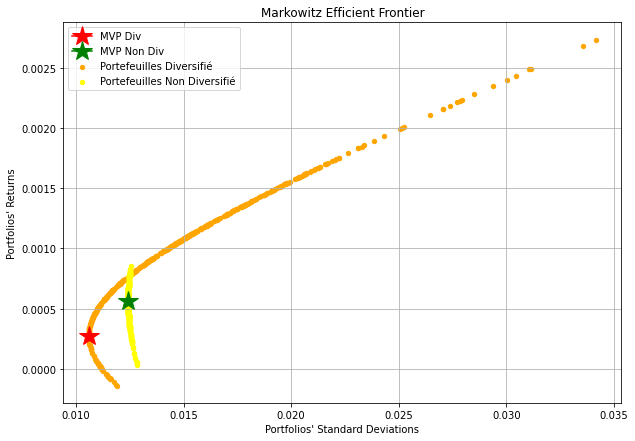

In [21]:
def weights_list(n):
    k = np.random.rand(n)
    return k / np.sum(k)

def analyse_moyenne_variance_risked_pf(returns, var_returns, nb_of_assets, number_of_simulations):
    portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = [], [], []
    for _ in range(number_of_simulations):
        returns_m = np.asmatrix(returns.mean())
        vars_m = np.asmatrix(var_returns)

        # Random portfolios
        w = np.asmatrix(weights_list(nb_of_assets))
        portfolio_return = w * returns_m.T

        #Optimisation
        e = np.asmatrix(np.ones(nb_of_assets))
        inv_vars_m = np.linalg.inv(vars_m)
        A = e * inv_vars_m * returns_m.T
        B = returns_m * inv_vars_m * returns_m.T
        C = e * inv_vars_m * e.T
        d = B*C - np.power(A, 2)
        f1 = inv_vars_m * returns_m.T
        f2 = inv_vars_m * e.T

        w_optimized = (1/d) * ((C * portfolio_return - A) * f1.T + (B - A * portfolio_return) * f2.T)
        portfolio_optimized_allocations.append(w_optimized)
        portfolio_optimized_returns.append(np.array(w_optimized * returns_m.T).flatten()[0])
        portfolio_optimized_stds.append(np.array(np.sqrt(w_optimized * vars_m * w_optimized.T)).flatten()[0])
    return portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations

# ------------------ Parameters ------------------ 
nb_of_assets = len(returns_div.columns)
number_of_simulations = 500

# ------------------ Portefeuille de variance minimale ------------------

# ------------ Portefeuille diversifi√© ------------
portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = analyse_moyenne_variance_risked_pf(returns_div, var_div_returns, nb_of_assets, number_of_simulations)
mvp_std = np.min(portfolio_optimized_stds)
index_mvp_std = portfolio_optimized_stds.index(mvp_std)
mvp_return =  portfolio_optimized_returns[index_mvp_std]
mvp_allocation = portfolio_optimized_allocations[index_mvp_std]

print("--- MVP Div --- ")
print("MVP Return: ", mvp_return)
print("MVP Std: ", mvp_std)
print("MVP Allocation: ", 100*mvp_allocation)

# ------------ Portefeuille non Diversifi√© ------------
portfolio_optimized_returns_nd, portfolio_optimized_stds_nd, portfolio_optimized_allocations_nd = analyse_moyenne_variance_risked_pf(returns_non_div, var_non_div_returns, nb_of_assets, number_of_simulations)
mvp_std_nd = np.min(portfolio_optimized_stds_nd)
index_mvp_std_nd = portfolio_optimized_stds_nd.index(mvp_std_nd)
mvp_return_nd =  portfolio_optimized_returns_nd[index_mvp_std_nd]
mvp_allocation_nd = portfolio_optimized_allocations_nd[index_mvp_std_nd]

print("\n--- MVP Non Div --- ")
print("MVP Return: ", mvp_return_nd)
print("MVP Std: ", mvp_std_nd)
print("MVP Allocation: ", 100*mvp_allocation_nd)
# ------------------ Fonti√®re efficiente ------------------
plt.figure(figsize=(10, 7))
plt.scatter(portfolio_optimized_stds, portfolio_optimized_returns, color="orange", marker="o", s=19, label="Portefeuilles Diversifi√©")
plt.scatter(portfolio_optimized_stds_nd, portfolio_optimized_returns_nd, color="yellow", marker="o", s=19, label="Portefeuilles Non Diversifi√©")
plt.plot(mvp_std, mvp_return, label = "MVP Div", marker="*", color="red", markersize=20)
plt.plot(mvp_std_nd, mvp_return_nd, label = "MVP Non Div", marker="*", color="green", markersize=20)
plt.title("Markowitz Efficient Frontier")
plt.xlabel("Portfolios' Standard Deviations")
plt.ylabel("Portfolios' Returns")
plt.grid()
plt.legend()

Nous avons trouver ci-dessus le point associ√© au portefeuille de variance minimale par une m√©thode num√©rique "np.min" qui utilise l'algorithme de tri 'quicksort' tr√®s efficace et d'ailleurs la plus efficace de tous les algo de tri avec une complexit√© $O(n*log(n))$.

Cependant nous pouvons tr√®s facilement trouver une solution ferm√©e √† ce probl√®me, puisque ce portefeuille se situe au point o√π la tangente est verticale par rapport √† la fronti√®re. Ce qui revient √† r√©soudre :

$$
\frac{\partial \sigma_p^2}{\partial \bar{r_p}} = 0
$$

$$
\begin{align*}
==> \bar{r_p} = \frac{A}{C} \\
==> \sigma_p^2 = \frac{1}{C}
\end{align*}
$$

Pour rappel les valeur de A et C ont √©t√© d√©termin√©es dans la r√©solution du probl√®me d'optimisation plus haut et valent toujours respectivement:

- $
e^T \cdot {\Sigma}^{-1} \cdot \mu
$
- $
e^T \cdot {\Sigma}^{-1} \cdot e
$

### Quelques conclusions graphiques quant √† l'application

L'ensemble des portefeuilles qu'il est possible de construire √† partir des n actifs est contenus dans l'air contenue √† l'int√©rieur de l'hyberbole.

Les portefeuilles dont l'esperance de rentabilit√© se trouve en dessous de A/C sont domin√©s c'est √† dire qu'il existe pour chacun des portefeuilles de cette portion de la courbe un autre portefeuille dont l'esp√©rance de rentabilit√© est plus √©lev√© pour une exposition au risque √©quivalente. Il s'agit du point symp√©triquement oppos√© et qui appartient √† la portion de la courbe que l'on appelle fronti√®re efficiente.

Ainsi, nous comprenons que dans le cadre de l'analyse moyenne-variance il nous faudra nous concentrer sur les portefeuilles contenue dans l'air au dessus de la droite horizontale d'√©quation: $\bar{r_p} = \frac{A}{C}$

Pour Markowitz (dans le cadre de son analyse moyenne-variance int√©gralement compos√© d'actifs risqu√©), un investisseur rationnel devra choisir le portefeuille minimisant la variance pour une esp√©rance de rentabilit√© sup√©rieur √† celle du portefeuille de variance minimale.

Plus tard, il sera int√©ressant de d√©terminer quelles conditions permettent de determiner les portefeuilles efficients dont les poids sont strictement positifs, i.e. les portefeuilles qui n'ont pas recours √† de la vente √† d√©couvert. Certains fonds sous la r√©gulation UCITS n'ont pas le droit d'avoir recours √† ce genre de gestion qui exposerait √† un risque plus √©lev√© les √©pargnants.

### Cas √† n actifs risqu√©s et un actif sans risque

Nous prendrons conventionnelement comme actif sans risque une obligation d'Etat √† taux fixe moyen terme (10 ans) de tr√®s bonne notation.

Pr√©c√©dement, nous avons men√© une analyse moyenne variance dans le cas o√π le march√© ne comportait aucun actif sans risque ce qui ne constitue pas toujours une bonne approximation et une approche rationnelle. Cependant la conjoncture de ces 5 derni√®res ann√©es (entre 2015-2022) avec la baisse des taux d'int√©r√™ts (jusqu'√† atteindre des niveaux n√©gatifs) ont √©t√© une conjoncture qui pouvait justifier la rationnalit√© de cette approche.

Pla√ßons nous d√©sormais dans un contexte de niveaux d'int√©r√™ts √©lev√©s un peu comme on est entrain de connaitre actuellement depuis un an. 

Notons $w_0$ la portion de la richesse investie dans l'actif sans risque, soit:
$$
w^T \cdot e + w_0 = 1 
$$

Ainsi, l'√©nonc√© de notre probl√®me d'optimisation sous contrainte a chang√© pour devenir:

$$
Min_w w^T \Sigma w
$$

$$ s.t. : w^T\cdot\mu + (1 -  w^T \cdot e) R_f = \bar{r_p} $$

Ainsi, via la m√©thode du Lagrangien nous transformons ce probl√®me d'optiomisation sous contrainte en un probl√®me d'optimisation libre dont la fonction objectif est: 

$$
Min_w(L(w, \lambda) = w^T \Sigma w + \lambda \cdot (w^T \cdot \mu + (1 -  w^T \cdot e) R_f))
$$

Les conditions du premier ordre n√©cessaires et suffisantes pour un minimum global sont:

$$
\begin{align*}
\frac{\partial \mathcal{L}}{\partial w} &= 2 \Sigma w + \lambda (\mu - e R_f) = 0 \\
\frac{\partial \mathcal{L}}{\partial \lambda} &= w^T \mu + (1 - w^T e) R_f = 0 \\
\end{align*}
$$

Apr√®s r√©solution, on obtient comme valeur de w:

$$
w = \Sigma^{-1} (\mu - e R_f) \cdot \frac{\bar{r_p} - R_f}{(\mu - e R_f)^T \Sigma^{-1} (\mu - e R_f)}
  = \Sigma^{-1} (\mu - e R_f) \cdot \frac{\bar{r_p} - R_f}{B - 2AR_f + C R_f^2}
$$

Ainsi, la variance d'un portefeuille de la fronti√®re efficiente s'√©crit:

$$
\sigma_p^2(\bar{r_p}) = \frac{(\bar{r_p} - R_f)^2}{B - 2AR_f + C R_f^2}
$$

On a donc pour un portefeuille de la fronti√®re efficient un √©cart type d√©fini par morceaux tel que:

$$
\frac{(\bar{r_p} - R_f)}{\sqrt(B - 2AR_f + C R_f^2)}, si \bar(r_p) \geq R_f \\
\frac{- (\bar{r_p} - R_f)}{\sqrt(B - 2AR_f + C R_f^2)}, si \bar(r_p) \leq R_f 
$$

<u> Conclusion </u>

Ainsi, en pr√©sence d'un actif sans risque, la fronti√®re efficiente est la r√©union de demi-droite se rejoignant au point de coordonn√©s (0, Rf) (Pour rappel la fronti√®re efficiente se trace dans le plan $(\sigma_p, \bar{r_p})$

### (Application) Cas d'un portefeuille √† n actifs risqu√© et un actif sans risque

In [22]:
data_div

AEP         DIT  JBLU
Date                                                  
2023-03-01 00:00:00-05:00  84.703156  169.211380  8.25
2023-03-02 00:00:00-05:00  86.301888  169.740448  8.32
2023-03-03 00:00:00-05:00  87.380775  173.164413  8.32
2023-03-06 00:00:00-05:00  87.655418  160.935989  8.40
2023-03-07 00:00:00-05:00  86.929604  172.455658  8.16
...                              ...         ...   ...
2023-07-25 00:00:00-04:00  86.640984  242.819565  7.88
2023-07-26 00:00:00-04:00  86.710266  238.822525  7.80
2023-07-27 00:00:00-04:00  84.384399  235.714844  7.70
2023-07-28 00:00:00-04:00  84.542755  224.832932  7.85
2023-07-31 00:00:00-04:00  83.869736  213.841095  7.77

[105 rows x 3 columns]

In [23]:
returns_div

AEP       DIT      JBLU
Date                                                   
2023-03-02 00:00:00-05:00  0.018875  0.003127  0.008485
2023-03-03 00:00:00-05:00  0.012501  0.020172  0.000000
2023-03-06 00:00:00-05:00  0.003143 -0.070617  0.009615
2023-03-07 00:00:00-05:00 -0.008280  0.071579 -0.028571
2023-03-08 00:00:00-05:00  0.007560 -0.019391 -0.012255
...                             ...       ...       ...
2023-07-25 00:00:00-04:00 -0.000685  0.031365 -0.056287
2023-07-26 00:00:00-04:00  0.000800 -0.016461 -0.010152
2023-07-27 00:00:00-04:00 -0.026823 -0.013013 -0.012821
2023-07-28 00:00:00-04:00  0.001877 -0.046166  0.019481
2023-07-31 00:00:00-04:00 -0.007961 -0.048889 -0.010191

[104 rows x 3 columns]

In [24]:
var_div_returns

AEP       DIT      JBLU
AEP   0.000170 -0.000038 -0.000015
DIT  -0.000038  0.001332 -0.000058
JBLU -0.000015 -0.000058  0.000697

Taux sans risque √©quivalent:  4%
Taux sans risque √©quivalent:  0.04
Tickers:  Index(['AEP', 'DIT', 'JBLU'], dtype='object')

--- MVP --- 
MVP Return:  [[0.00015357]]
MVP Std:  3.2587115876992126e-06
MVP Allocation: 
Risked Assets: [[0.0023599042269810294], [-0.00866963265288388], [0.0016857157354710178]]
Unrisked Asset: [[100.00462401]]


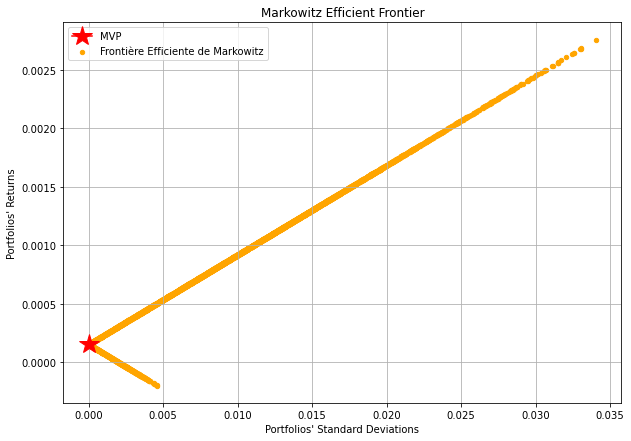

In [25]:
def analyse_moyenne_variance_less_risky_pf(returns, var_returns, r_f, nb_of_assets, number_of_simulations):
    r_f = np.power((1 + r_f), 1/255) - 1
    portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = [], [], []
    for _ in range(number_of_simulations):
        returns_m = np.asmatrix(returns.mean())
        vars_m = np.asmatrix(var_returns)

        # Rendements des portefeuilles
        w = np.asmatrix(weights_list(nb_of_assets))
        portfolio_return = w * returns_m.T
        
        #Optimisation
        inv_vars_m = np.linalg.inv(vars_m)
        e = np.asmatrix(np.ones(nb_of_assets))
        A = e * inv_vars_m * returns_m.T
        B = returns_m * inv_vars_m * returns_m.T
        C = e * inv_vars_m * e.T

        w_optimized = inv_vars_m.T * (returns_m - e * r_f).T * (portfolio_return - r_f) / (B - 2 * A * r_f + C * r_f**2)
        portfolio_optimized_allocations.append(w_optimized)
        portfolio_optimized_returns.append(w_optimized.T * returns_m.T + (1- np.sum(w_optimized)) * r_f)
        if portfolio_return >= r_f:
            std_optimized = (portfolio_return - r_f)/np.sqrt(B - 2 * A * r_f + C * r_f**2)
            portfolio_optimized_stds.append(std_optimized)
        else:
            std_optimized = - (portfolio_return - r_f)/np.sqrt(B - 2 * A * r_f + C * r_f**2)
            portfolio_optimized_stds.append(std_optimized)
    
    return portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations

    # ------------------ Param√®tre ------------------
number_of_simulations = 5000
nb_of_assets = len(returns_div.columns)
r_f = 0.04
print("Taux sans risque √©quivalent: ", "4%")
print("Taux sans risque √©quivalent: ", r_f) #Journalier
print("Tickers: ", returns_div.columns)

# ------------------ Portefeuille de variance minimale ------------------
portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = analyse_moyenne_variance_less_risky_pf(returns_div, var_div_returns, r_f, nb_of_assets, number_of_simulations)
mvp_std = np.min(portfolio_optimized_stds)
index_mvp_std = portfolio_optimized_stds.index(mvp_std)
mvp_return  = portfolio_optimized_returns[index_mvp_std]
mvp_allocation = portfolio_optimized_allocations[index_mvp_std]

print("\n--- MVP --- ")
print("MVP Return: ", mvp_return)
print("MVP Std: ", mvp_std)
print("MVP Allocation: ")
print("Risked Assets:", (100*mvp_allocation).tolist())
print("Unrisked Asset:", 100*(1 - sum(mvp_allocation)))

# ------------------ Fonti√®re efficiente ------------------
plt.figure(figsize=(10, 7))
plt.scatter(portfolio_optimized_stds, portfolio_optimized_returns, color="orange", marker="o", s=19, label="Fronti√®re Efficiente de Markowitz")
plt.plot(mvp_std, mvp_return, label = "MVP", marker="*", color="red", markersize=20)
plt.title("Markowitz Efficient Frontier")
plt.xlabel("Portfolios' Standard Deviations")
plt.ylabel("Portfolios' Returns")
plt.grid()
plt.legend()

#### Conclusion graphique

Nous observons ci-dessus la fronti√®re efficiente d'un portefeuille contenant 6 actifs risqu√©s (actions) et un actif sans risque (obligation d'√©tat am√©ricain).

A l'instar de l'analyse moyenne-variance sur un portefeuille exclusivement risqu√©, la repartition des portefeuilles met en √©vidence encore une fois qu'il existe plusieurs portefeuilles expos√©s √† un m√™me niveau de risque sur la base des m√™mes actifs. Ainsi, nous comprendrons que la branche d√©croissante repr√©sente l'ensemble des portefeuilles qui maximise le risque et la branche croissante (fronti√®re efficiente) ceux qui le minimise pour un m√™me niveau de risque.

Le marker √©toile rouge repr√©sente le portefeuille de variance minimale qui sera, dans ce cas de figure d'apr√®s √©tude analytique, toujours de coordonn√©es (0, Rf) qui repr√©sente le portefeuille o√π l'on alloue pratiquement l'int√©gralit√© du poids √† l'actif sans risque.

### Comparaison avec le portefeuille risk only

Comparons d√©sormais les r√©sultats d'un tel portefeuille avec celui d'un portefeuille risqu√©. Dans le cadre d'un portefeuille risqu√©, le portefeuille de minimum variance correspond au point de coordonn√©es $(1/\sqrt C, A/C)$ sur le plan  (ùúéùëù,ùëüùëù¬Ø)

#### Cas Rf < A/C

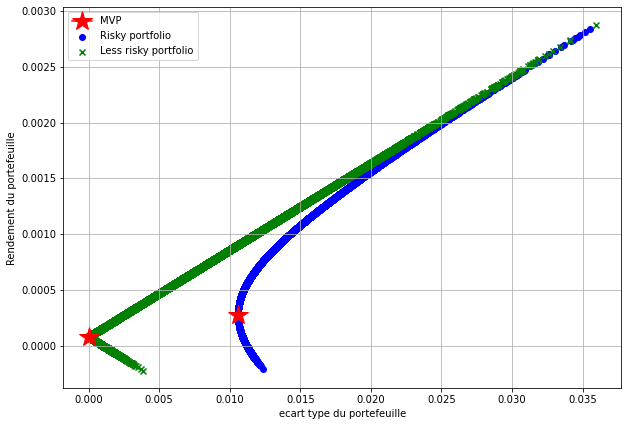

In [26]:
# Param√®tres
nb_of_assets = len(returns_div.columns)
number_of_simulations = 5000
r_f = 0.02

returns_risky_pf, stds_risky_pf, alloc_risky_pf = analyse_moyenne_variance_risked_pf(returns_div, var_div_returns, nb_of_assets, number_of_simulations)
returns_less_risky_pf, stds_less_risky_pf, alloc_less_risky_pf = analyse_moyenne_variance_less_risky_pf(returns_div, var_div_returns, r_f, nb_of_assets, number_of_simulations)

plt.figure(figsize=(10, 7))
# MVPs
### risky
mvp_std = np.min(stds_risky_pf)
index_mvp_std = stds_risky_pf.index(mvp_std)
mvp_return  = returns_risky_pf[index_mvp_std]
plt.plot(mvp_std, mvp_return, label = "MVP", marker="*", color="red", markersize=20)

###Less risky
mvp_std = np.min(stds_less_risky_pf)
index_mvp_std = stds_less_risky_pf.index(mvp_std)
mvp_return  = returns_less_risky_pf[index_mvp_std]
plt.plot(mvp_std, mvp_return, marker="*", color="red", markersize=20)

# Courbes
plt.scatter(stds_risky_pf, returns_risky_pf, marker="o", color="blue", label="Risky portfolio")
plt.scatter( stds_less_risky_pf, returns_less_risky_pf, marker="x", color="green", label="Less risky portfolio")
plt.xlabel("ecart type du portefeuille")
plt.ylabel("Rendement du portefeuille")
plt.grid()
plt.legend()
plt.show()

Dans ce cas pr√©sent, nous avons un taux sans risque inf√©rieur √† A/C qui correspond au rendement esp√©r√© du portefeuille de variance minimale exclusivement expos√© √† des actifs risqu√©s. 

Nous pouvons conjecturer graphiquement que si le taux sans risque est inf√©rieur √† A/C alors la demi-droite efficiente  de l'ensemble des portefeuille contenant un actif non risqu√© est tangent √† la fronti√®re efficiente du second.

<u> D√©monstration </u>

Nous devons trouver le point d'intersection entre les droites efficientes (portions de courbes croissantes) de la courbe verte et de la courbe bleue.

Notons ce portefeuille $_{inter}$.
Tout d'abord notons que ce portefeuille doit v√©rifier $w_0 = 0$ tel que: $ e^T w = 1$

En substituant √† l'√©quation: $ w = \Sigma^{-1} (\mu - e R_f) \cdot \frac{\bar{r_p} - R_f}{B - 2AR_f + C R_f^2}$

Nous obtenons:

$ \bar{r_p} - R_f = \frac{B - 2AR_f + C R_f^2}{A - C R_f}$

Donc, 

$$
w_{inter} = \frac{\Sigma^{-1}(\mu - e R_f)}{A - C R_f} \\
E(R_{inter}) = \frac{B - A R_f}{A - C R_f} \\
\sigma^2(R_{inter}) = \frac{B - 2AR_f + C R_f^2}{(A - C R_f)^2}
$$

Ainsi, nous avons montr√© dans cette partie que si $ R_f < A/C $ Alors, leur portefeuille commun se siue sur la fronti√®re efficiente.

Notez de m√™me que les portefeuilles efficients sur la portion de la demi-droite avant tangence correspondent aux portefeuilles o√π $w_0 >= 0$, au dela nous nous retrouvons avec des portefeuilles √† allocation n√©gative sur l'actif sans risque, ce qui n'est pas r√©aliste.

Nouvelle version du th√©or√®me de s√©paration √† deux fonds:

Dans un march√© contenant un actif sans risque, tout portefeuille peut √™tre per√ßu comme une combinaison lin√©aire de deux portefeuille un portefeuille compos√© de l'actif sans risque et un portefeuille compos√© des actifs risqu√©s.

Dans ce mod√®le, tous les investisseurs se situerait sur cette demi droite en fonction de leur richesse, de leur niveau d'aversion au risque. Un investisseur ayant moins d'aversion au risque placera un portion de richesse non nulle sur le portefeuille $w_inter$. Il pourrait meme faire jouer un effet de levier en allouant plus d 100% aux actifs risqu√©s et en vendant √† d√©couvert l'actif sans risque.

#### Cas Rf > A/C

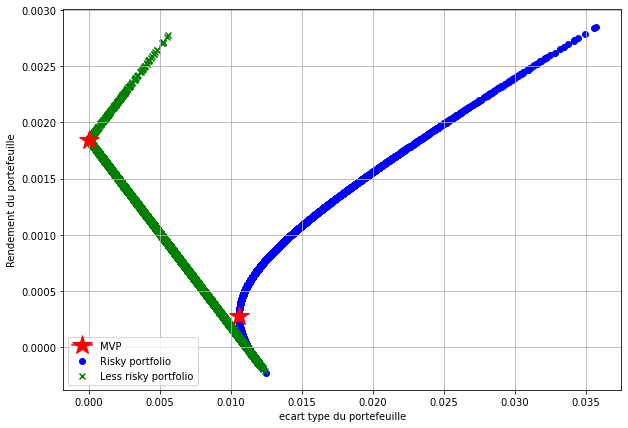

In [27]:
# Param√®tres
nb_of_assets = len(returns_div.columns)
number_of_simulations = 5000
r_f = 0.6

returns_risky_pf, stds_risky_pf, alloc_risky_pf = analyse_moyenne_variance_risked_pf(returns_div, var_div_returns, nb_of_assets, number_of_simulations)
returns_less_risky_pf, stds_less_risky_pf, alloc_less_risky_pf = analyse_moyenne_variance_less_risky_pf(returns_div, var_div_returns, r_f, nb_of_assets, number_of_simulations)

plt.figure(figsize=(10, 7))
# MVPs
### risky
mvp_std = np.min(stds_risky_pf)
index_mvp_std = stds_risky_pf.index(mvp_std)
mvp_return  = returns_risky_pf[index_mvp_std]
plt.plot(mvp_std, mvp_return, label = "MVP", marker="*", color="red", markersize=20)

###Less risky
mvp_std = np.min(stds_less_risky_pf)
index_mvp_std = stds_less_risky_pf.index(mvp_std)
mvp_return  = returns_less_risky_pf[index_mvp_std]
plt.plot(mvp_std, mvp_return, marker="*", color="red", markersize=20)

# Courbes
plt.scatter(stds_risky_pf, returns_risky_pf, marker="o", color="blue", label="Risky portfolio")
plt.scatter( stds_less_risky_pf, returns_less_risky_pf, marker="x", color="green", label="Less risky portfolio")
plt.xlabel("ecart type du portefeuille")
plt.ylabel("Rendement du portefeuille")
plt.grid()
plt.legend()
plt.show()

Dans ce cas de figure, le taux sans risque est sup√©rieur au rendement du portefeuille de variance minimale 
et on peut conjecturer mani√®re analogue √† la pr√©c√©dente √©tude, que la demi-droite des portefeuilles domin√©s est tangente √† la portion de courbe des protefeuilles risqu√©s domin√©s.

Ce cas de figure permet d'avoir des portfeuilles avec un vrai placement sans risque plus optimis√©s qu'un portfeuille risqu√© sur les deux demi droites et doit d√©courager l'investisseur √† placer dans des portefeuilles dont l'√©cart type est inclus dans l'intervalle $[0, 1/\sqrt C]$

### Sensibilit√©s du portefeuille

Comme nous avons pu le voir dans les sections pr√©c√©dentes, l'analyse moyenne-variance repose fortement sur le calcul des vecteurs de rendements et de la matrice de variance-covariance. 
Cette approche implique quelques limites:

- la consid√©ration de ce vecteur et de cette matrice comme stationnaires, ce qui peu sur le long-moyen terme dans des march√©s liquides √™tre une approximation valable mais PAS TOUOURS.

- Les portefeuilles institutionnelles exposant l'√©pargne public sont soumis √† des contraintes de diversification en terme de nombres d'actifs ce qui rend les calculs assez fastidieux.

- Il y a aussi les probl√®mes inh√©rent √† l'inversion de la matrice de variance-covariance qui complique la r√©solution

Cependant, il existe des m√©thodes bas√©es sur des hypoth√®ses simplificatrices qui permettent de r√©duire l'impact de ces limites:

- Mod√®les d'indices pour mod√©liser les fluctuations des rendements des titres financiers
- Supposer que les corr√©lations des titres de m√™me cat√©gories restes constantes

<u> Quelques m√©thodes </u>


- Mod√®le indiciel

-- Mod√®le de march√©s √† indice unique ou multi-indice -- 

Mod√®le de march√© √† indice unique

Dans cette situation, il sera th√©oriquement suffisant de calculer la covariance entre le rendement du chaque titre et celui de l'indice, ce qui reduit la complexit√© de calcul passant d'une complexit√© quadratique √† une complexit√© lin√©aire.

Mod√®le de march√© multi indice

Dans cette situation, il sera th√©oriquement suffisant de regrouper les actifs par indice et d'appliquer la covariance indicielle juste.

-- M√©thode d'Elton, Gruber et Padberg --

Cette m√©thode consiste √† class√© les actifs par ratio de Treynor, selectionn√© l'ensemble des titres sup√©rieurs √† un ratio seuil.

- Mod√®les de correction moyenne

Mod√®le de la moyenne g√©n√©rale qui pr√©suppose que tous les titres appratiennent √† la m√™me cat√©gorie et que leur coefficient de corr√©lation est √©gal √† la moyenne des coefficients de corr√©lations observ√©s entre les actifs.

Mod√®le de la moyenne g√©n√©rale par secteur qui pr√©suppose que tous les titres appartiennent au moins √† une cat√©gorie et que leur coefficient de corr√©lation est constant vis √† vis de cette cat√©gorie et est √©gal √† la moyenne des coefficients de corr√©lations observ√©s dans la cat√©gorie.

Conclusions empiriques sur les diff√©rentes approches

L'estimation directe de la matrice de variances-covariances sur des donn√©es historiques ne fournit pas une bonne pr√©diction des corr√©lations futurs. Les mod√®les √† indices ou √† moyenne permettent une meilleure pr√©cision en r√©duisant l'impact des fluctuation, cependant le risque d'estimation n'est qu'en partie supprim√©.

Travaux et assentiment g√©n√©ral:

Best et Grauer (1991) ont d√©montr√© empiriquement que la prise en compte d'un certain nombre de contraintes portant notamment sur les ventes √† d√©couvert permettent de r√©duire en partie les cons√©quences des erreurs d'estimation.

Frost et Savarion (1988) ont d√©montr√© empiriquement que le risque d'estimation √©tait bien plus fort sur les rendements plut√¥t que sur les variances-covariances. Ils ont ainsi d√©montr√© que dans un cas de fort risque d'estimation il sera judicieux de r√©duire ce risque en √©quipond√©rant le portefeuille.

### Applications Analyse Moyenne-Variance avec hypoth√®ses simplificatrices et methodes de corrections

Ainsi, mettons nous au niveau des gestionnaires institutionnelles qui doivent r√©pondre √† certaines exigences de profondeur de portefeuilles qui peuvent contenir jusqu'√† plusieurs centaines de titres.

L'id√©e dans cette section est alors d'appliquer les m√©thodes de simplification et d'optimisation de calculs √©nonc√©es dans la pr√©c√©dente partie.

#### Mod√®le de march√© √† indice unique

Appliquons ce mod√®le en selectionnant des big et mega caps americaines (selection al√©atoire pour le moment, les crit√®res de screening seront vu plus tard) et en utilisant tout naturellement comme indice de march√© le S&P 500 (indice le plus repr√©sentatif du march√© action am√©ricain).

#### Mod√®le de march√© √† indice mutliple

Appliquons ce mod√®le en triant notre portefeuilles d'actions par secteur et en utilisant des indices sectorielles.

### Contraintes suppl√©mentaires

Pour l'instant nous n'avons r√©solu que des probl√®mes d'optimisations avec une seule contrainte, la contrainte de budget qui permet une utilisation globale de la richesse disponible: $ w^T e = 1 $

Or, il est tout √† fait possible d'ajouter des contraintes suppl√©mentaires √† notre probl√®me, tel que des co√ªts de transaction, des plafonds et des seuils d'allocations, ... . Formellement, il s'agit de r√©soudre des programmes d'optimisation du type: 

$$ 
Min_w(w^T \Sigma w) \\
w^T e = 1 \\
w ‚Ç¨ K \\
$$

Ceci fait pr√©cis√©ment l'objet de ce que l'on appelle la programmation convexe qui consiste √† maximiser ou minimiser une fonction prenant ces valeurs dans un ensemble convexe. Cette exercice peut √™tre particuli√®rement difficile sauf dans le cas particulier o√π K est un c√¥ne.

Algorithmes de r√©solutions connus: Frank et Wolfe (1956) , Perold (1984), Nesterov et Nemirovski (1995)

<u> Exemple d'ensemble K et de contraintes </u> 

L'ensemble K peut correspondre √† un intervalle dans lequel les poids doivent prendre leur valeur, un ensemble du type: $ A \leq w \leq B $

Les gestionnaires institutionnelles doivent necessairement utilis√©s ce type de contrainte pour r√©pondre √† des exigences r√©glementaire pour des soucis de diversification en terme de nombre d'actifs sous gestions et de poids allou√©s √† chacun d'entre eux ce qui vise √† r√©duire leur impact individuel.

Dans le cadre d'une strat√©gie du type constant mix, il peut y avoir aussi des contraintes de rebalancement en limitant la somme des achats de titres:
$$
V_0 \cdot \Sigma_i Max(w_i - w_0, 0) \leq s
$$

### Crit√®re de choix d'un unique portefeuille efficace

#### Crit√®re de selection "moyenne-variance"

Selon ce crit√®re, la valeur d'utilit√© qu'un investisseur attribue √† un portefeuille est une fonction de sa variance et de son esp√©rance attendues.

o√π:

$$
V(R_p) = f(\sigma(R_p)^2, E(R_p)) \\
f_1 = \frac{\partial{f}}{\partial{E(R_p)}} \\
f_2 = \frac{\partial{f}}{\partial{\sigma(R_p)^2}}
$$

La premi√®re d√©riv√©e partielle indique une condition de croissance de $V(R_p)$ vis √† vis de l'esp√©rance de rendement et la deuxi√®me implique une condition de d√©croissance de $V(R_p)$ vis √† vis de la volatilit√© attendue ce qui traduit l'aversion au risque que doit √©prouver un ivestisseur rationnel. 

Dans le cas de la gestion de portefeuille, il est courant d'√©tudier la valeur d'utilit√© suivante:

$$ 
V(R_p) = E(R_p) - \frac{\phi}{2} \cdot \sigma^2(R_p)
$$

Le param√®tre $\phi$ est un nombre r√©el strictement positif qui traduit le degr√© d'aversion de l'investisseur plus. Ce param√®tre est appel√© taux marginal de substitution entre l'esperance de rendement du portefeuille et son risque.

Ainsi, le programme d'optimisation d'un investisseur caract√©ris√© par un certain degr√© d'aversion $\phi$ et cherchant √† construire un portefeuille d'actifs efficient s'√©crit: 

$$
Max(w^T \mu - \frac{\phi}{2} \cdot w^T \Sigma w)\\
\\
Sc : w^T e = 1\\
$$

Apr√®s r√©solution du syst√®me lin√©aire donn√© par le lagrangien de ce probl√®me d'optimisation, on obtient:

$$
w = \frac{1}{\phi} \cdot (\Sigma^{-1} \mu - \frac{(A-\phi)}{C} \cdot \Sigma^{-1} e)
$$

Ainsi, nous avons les solutions suivantes :

$$
E(R_p) = w^T \mu = \frac{d}{\phi \cdot C} + \frac{A}{C} \\
\sigma^2(R_p) = w^T \Sigma w = \frac{d}{\phi^2 \cdot C} + \frac{1}{C}
$$

Remarquons que lorsque l'on fait tendre $\phi \to +\infty$ (vers une aversion totale du risque), on obtient:

$$
E(R_p) \to  \frac{A}{C} \\
\sigma^2(R_p) \to  \frac{1}{C}
$$

On reconnait les valeurs d'esp√©rance et de variance associ√©es au portefeuille de variance minimale de la fronti√®re efficiente.

A l'inverser lorsque l'on fait tendre $\phi \to 0$, vers une absence totale d'aversion au risque), on obtient:

$$
E(R_p) \to  +\infty \\
\sigma^2(R_p) \to   +\infty
$$


L'ensemble des portefeuilles, w, associ√© √† ce programme d'optimisation repr√©sente tous les portefeuilles qui constituent la fronti√®re efficiente vu pr√©c√©dement.

Appliquons ce crit√®re moyenne variance en faisant varier le taux marginal de substitution. 

In [28]:
returns_div

AEP       DIT      JBLU
Date                                                   
2023-03-02 00:00:00-05:00  0.018875  0.003127  0.008485
2023-03-03 00:00:00-05:00  0.012501  0.020172  0.000000
2023-03-06 00:00:00-05:00  0.003143 -0.070617  0.009615
2023-03-07 00:00:00-05:00 -0.008280  0.071579 -0.028571
2023-03-08 00:00:00-05:00  0.007560 -0.019391 -0.012255
...                             ...       ...       ...
2023-07-25 00:00:00-04:00 -0.000685  0.031365 -0.056287
2023-07-26 00:00:00-04:00  0.000800 -0.016461 -0.010152
2023-07-27 00:00:00-04:00 -0.026823 -0.013013 -0.012821
2023-07-28 00:00:00-04:00  0.001877 -0.046166  0.019481
2023-07-31 00:00:00-04:00 -0.007961 -0.048889 -0.010191

[104 rows x 3 columns]

In [29]:
var_div_returns

AEP       DIT      JBLU
AEP   0.000170 -0.000038 -0.000015
DIT  -0.000038  0.001332 -0.000058
JBLU -0.000015 -0.000058  0.000697

In [30]:
def critere_moyenne_variance_pb1(returns, var_returns, phi, nb_of_assets, number_of_simulations):
    portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = [], [], []
    returns_m = np.asmatrix(returns.mean())
    vars_m = np.asmatrix(var_returns)

    # Rendements des portefeuilles
    w = np.asmatrix(weights_list(nb_of_assets))
    
    #Optimisation
    inv_vars_m = np.linalg.inv(vars_m)
    e = np.asmatrix(np.ones(nb_of_assets))
    A = e * inv_vars_m * returns_m.T
    B = returns_m * inv_vars_m * returns_m.T
    C = e * inv_vars_m * e.T
    phi_2 = np.array((A - phi)/C).flatten()[0]
    w_optimized = (1/phi) * (inv_vars_m * returns_m.T - (phi_2 * inv_vars_m * e.T))
    portfolio_optimized_allocations.append(w_optimized)
    portfolio_optimized_returns.append(np.array(w_optimized.T * returns_m.T).flatten()[0])
    portfolio_optimized_stds.append(np.array(np.sqrt(w_optimized.T * vars_m * w_optimized)).flatten()[0])
    
    return portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations

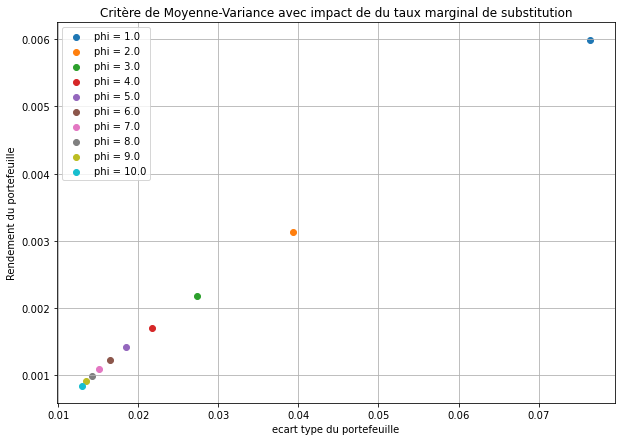

In [31]:
# -------------------- Param√®tres --------------------
number_of_simulations = 5000
nb_of_assets = len(returns_div.columns)
# -------------------- Trac√©s Fronti√®res Efficientes --------------------
plt.figure(figsize=(10, 7))
for phi in np.linspace(1, 10, 10):
    
    portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = critere_moyenne_variance_pb1(returns_div, var_div_returns, phi, nb_of_assets, number_of_simulations)
    plt.scatter(portfolio_optimized_stds, portfolio_optimized_returns, label= f"phi = {phi}")
plt.title("Crit√®re de Moyenne-Variance avec impact de du taux marginal de substitution")
plt.xlabel("ecart type du portefeuille")
plt.ylabel("Rendement du portefeuille")
plt.grid()
plt.legend()
plt.show()

#### Crit√®re Moyenne Variance Sous contrainte de budget et d'esp√©rence de rendement

In [32]:
def critere_moyenne_variance_pb2(returns, var_returns, phi, nb_of_assets, number_of_simulations):
    portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = [], [], []
    for _ in range(number_of_simulations):
        returns_m = np.asmatrix(returns.mean())
        vars_m = np.asmatrix(var_returns)

        # Rendements des portefeuilles
        w = np.asmatrix(weights_list(nb_of_assets))
        portfolio_return = w * returns_m.T
        portfolio_std = np.sqrt(w * vars_m * w.T)
        
        #Optimisation
        inv_vars_m = np.linalg.inv(vars_m)
        e = np.asmatrix(np.ones(nb_of_assets))
        A = e * inv_vars_m * returns_m.T
        B = returns_m * inv_vars_m * returns_m.T
        C = e * inv_vars_m * e.T
        D = returns_m * inv_vars_m * e.T
        
        lambd = ((phi-A)/C) - (A/(B*C-A*D)) * (portfolio_return * phi - ((phi - A)/C) - B)
        gamma = (C/(B*C-A*D)) * (portfolio_return * phi - ((phi - A)/C) - B)
        
        w_optimized = (1/phi) * inv_vars_m * (lambd * e + (1 + gamma) * returns_m).T
        portfolio_optimized_allocations.append(w_optimized)
        
        portfolio_optimized_returns.append(np.array(w_optimized.T * returns_m.T).flatten()[0])
        portfolio_optimized_stds.append(np.array(np.sqrt(w_optimized.T * vars_m * w_optimized)).flatten()[0])
    
    return portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations

res = critere_moyenne_variance_pb2(returns_div, var_div_returns, phi, nb_of_assets, number_of_simulations)

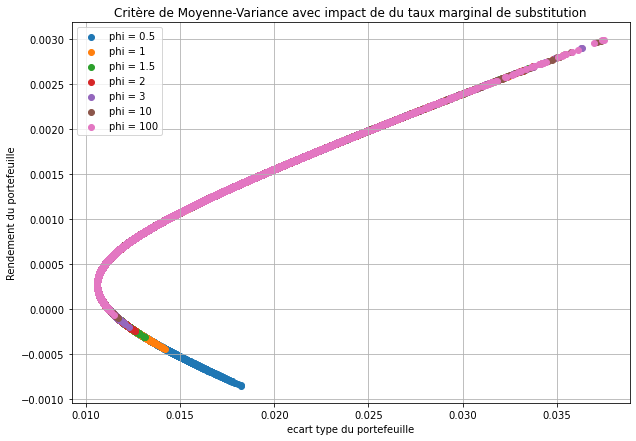

In [33]:
# -------------------- Param√®tres --------------------
number_of_simulations = 5000
nb_of_assets = len(returns_div.columns)
# -------------------- Trac√©s Fronti√®res Efficientes --------------------
plt.figure(figsize=(10, 7))
for phi in [0.5, 1, 1.5, 2, 3, 10, 100]:
    portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = critere_moyenne_variance_pb2(returns_div, var_div_returns, phi, nb_of_assets, number_of_simulations)
    plt.scatter(portfolio_optimized_stds, portfolio_optimized_returns, label= f"phi = {phi}")
plt.title("Crit√®re de Moyenne-Variance avec impact de du taux marginal de substitution")
plt.xlabel("ecart type du portefeuille")
plt.ylabel("Rendement du portefeuille")
plt.grid()
plt.legend()
plt.show()

### Crit√®re de Protection de rendement

Ces crit√®res permettent de choisir les portefeuilles qui limitent d'avoir un rendement faible. 
Les gestionnaires de fonds garantie ou encore les structureurs utilisent ces crit√®res de selection pour se pr√©munir contre l'incapacit√© de pouvoir r√©pondre √† leurs obligations de paiements minimales.

Nous allons ici en introduire les crit√®res de :

- Roy (1952)


- Tesler (1956)


- Kataoka (1963)

#### Crit√®re de Roy

Soit $R_p$ le rendement du portefeuille et $R_min$ le rendement minimum attendu par le gestionnaire.

Le crit√®re de Roy consistera √† minimiser la probabilit√© que $R_p < R_{min}$:

$$
Min(P(R_p < R_{min})
$$

Pour illustrer ce crit√®re de mani√®re simple nous allons poser quelques hypoth√©ses simplificatrices:

- Le vecteur des rendements des actifs suivent une loi normale multivari√©e (ou loi normale multidimensionnelle) (1)

- Mod√®le d'un march√© sans actif sans risque (2)

- Pas de rebalancement dynamique (3)

Ainsi, de l'hypoth√®se (1) on en d√©duit que :

$$
R_p \sim N(\bar{R_p}, \sigma_p) \Leftrightarrow \frac{R_p - \bar{R_p}}{\sigma_p} \sim N(0, 1)
$$

Le crit√®re de Roy devient:

$$
Min(P(\frac{R_p - \bar{R_p}}{\sigma_p} < \frac{R_{min} - \bar{R_p}}{\sigma_p}))
$$

Ainsi, le probl√®me d'optimisation qui en d√©coule doit maximiser le quotient:

$$
Max(\frac{\bar{R_p} - R_{min}}{\sigma_p})
$$

Analytiquement, on comprend que ce probl√®me d'optimisation, revient √† maximiser la pente "a" de la fonction lin√©aire dans le plan esp√©rance ecart-type:

$$\bar{R_p} = a \cdot \sigma_p + R_{min} $$

Cette droite part du point d'interception $R_{min}$ et on verra ci-dessous que le portefeuille qui maximise cette pente est le portefeuille tangent.

----------AEP----------
Statistics=0.985, p=0.316
AEP distribution looks Gaussian (fail to reject H0)
----------DIT----------
Statistics=0.977, p=0.072
DIT distribution looks Gaussian (fail to reject H0)
----------JBLU----------
Statistics=0.989, p=0.566
JBLU distribution looks Gaussian (fail to reject H0)


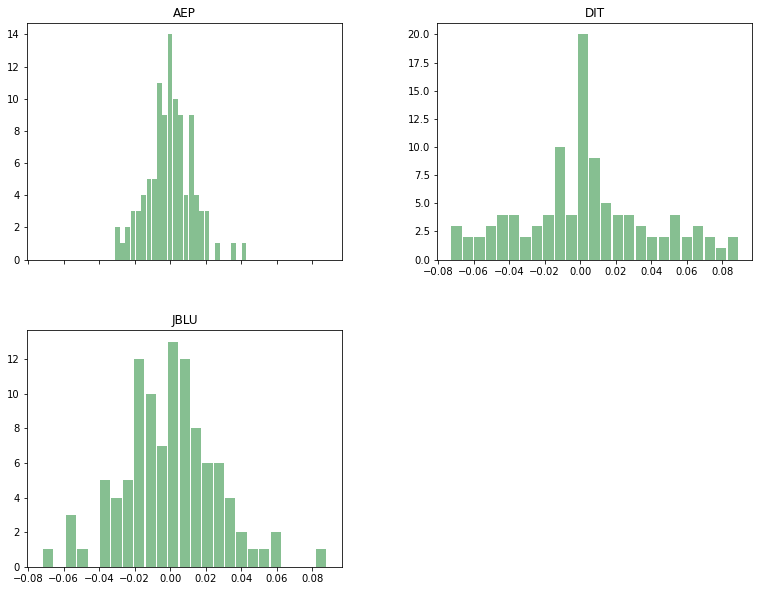

In [34]:
# Verification de l'hypoth√®se de loi multivari√©e avec le test de Shapiro Wilk
from scipy.stats import shapiro

ax = returns_div.hist(bins=25, grid=False, figsize=(13,10), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

alpha = 0.01
for stock in returns_div.columns:
    stat, p = shapiro(returns_div[stock])
    print("-"*10 + stock + "-"*10)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print(f'{stock} distribution looks Gaussian (fail to reject H0)')
    else:
        print(f'{stock} distribution does not look Gaussian (reject H0)')

--- MVP --- 
MVP Return:  0.00027540308382714246
MVP Std:  0.010581467280544071
MVP Allocation:  [[70.2307474  11.21432376 18.55492884]]
Rmin = 0.0001538185471079423


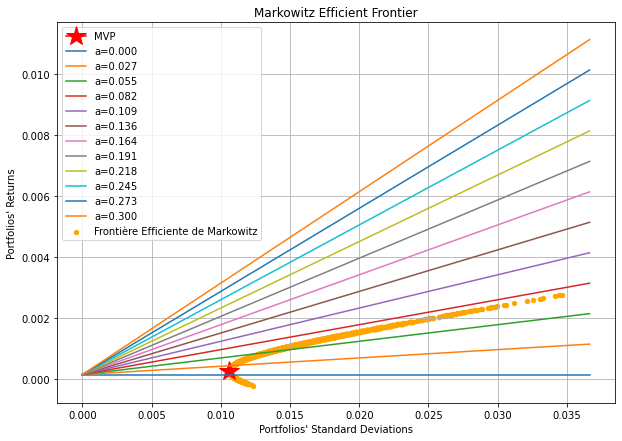

In [35]:
# ------------------ Portefeuille de variance minimale ------------------
nb_of_assets = len(returns_div.columns)
number_of_simulations = 2000
portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = analyse_moyenne_variance_risked_pf(returns_div, var_div_returns, nb_of_assets, number_of_simulations)
mvp_std = np.min(portfolio_optimized_stds)
index_mvp_std = portfolio_optimized_stds.index(mvp_std)
mvp_return =  portfolio_optimized_returns[index_mvp_std]
mvp_allocation = portfolio_optimized_allocations[index_mvp_std]

print("--- MVP --- ")
print("MVP Return: ", mvp_return)
print("MVP Std: ", mvp_std)
print("MVP Allocation: ", 100*mvp_allocation)


plt.figure(figsize=(10, 7))
# ------------------ Fonti√®re efficiente ------------------
plt.scatter(portfolio_optimized_stds, portfolio_optimized_returns, color="orange", marker="o", s=19, label="Fronti√®re Efficiente de Markowitz")
# ------------------ Fonti√®re efficiente ------------------
plt.plot(mvp_std, mvp_return, label = "MVP", marker="*", color="red", markersize=20)
# ------------------ Crit√®re de Roy ------------------
Rmin = (1 + 0.04)**(1/255) - 1
print("Rmin =", Rmin)
sigmas = np.array([0, max(portfolio_optimized_stds) + 0.002])
for a in np.linspace(0, 0.30, 12):
    Rp = a * sigmas + Rmin
    plt.plot(sigmas, Rp, label="a=%.3f" % a)

plt.title("Markowitz Efficient Frontier")
plt.xlabel("Portfolios' Standard Deviations")
plt.ylabel("Portfolios' Returns")
plt.grid()
plt.legend()
plt.show()

Par notre simulation num√©rique on supposerait que la pente a serait autour de 0.245

Essayons de le d√©montrer rigoursement en r√©solvant l'√©quation caract√©ristque de l'hyperbole :

$$ 
\frac{\sigma_p^2(R_p)}{\frac{1}{C}} - \frac{(E(R_p)-\frac{A}{C})^2}{\frac{d}{C^2}} = 1
$$

En substituant $E(R_p)$ par $ a \cdot \sigma_p(R_p) + R_{min} $, nous avons une equation du second degr√© sur $\sigma_p$. La pente sera la solution positive de l'√©quation associ√©e √† son discrimant nul:

$$\Delta = 0$$

En r√©solvant, nous obtenons la solution:

$$
a = \sqrt{\frac{d + A^2 + R_{min}^2 \cdot C^2 - 2 \cdot A \cdot R_{min} \cdot C}{C}}
$$

In [36]:
def analyse_moyenne_variance_risked_with_Roy_criteria(returns, var_returns, nb_of_assets, number_of_simulations, Rmin):
    portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations = [], [], []
    for _ in range(number_of_simulations):
        returns_m = np.asmatrix(returns.mean())
        vars_m = np.asmatrix(var_returns)

        # Random portfolios
        w = np.asmatrix(weights_list(nb_of_assets))
        portfolio_return = w * returns_m.T

        #Optimisation
        e = np.asmatrix(np.ones(nb_of_assets))
        inv_vars_m = np.linalg.inv(vars_m)
        A = e * inv_vars_m * returns_m.T
        B = returns_m * inv_vars_m * returns_m.T
        C = e * inv_vars_m * e.T
        d = B*C - np.power(A, 2)
        f1 = inv_vars_m * returns_m.T
        f2 = inv_vars_m * e.T

        w_optimized = (1/d) * ((C * portfolio_return - A) * f1.T + (B - A * portfolio_return) * f2.T)
        portfolio_optimized_allocations.append(w_optimized)
        portfolio_optimized_returns.append(np.array(w_optimized * returns_m.T).flatten()[0])
        portfolio_optimized_stds.append(np.array(np.sqrt(w_optimized * vars_m * w_optimized.T)).flatten()[0])
        
    #Tangente
    pente = np.array(np.sqrt((d+(A**2)+(Rmin**2)*(C**2)-(2*A*Rmin*C))/C)).flatten()[0]
    
    #Intersection
    sigma_inter = -(2 * pente * (Rmin-(A/C)))/(2 * (pente**2 - (d/C)))
    return_inter = pente * sigma_inter + Rmin
    allocation_inter = 1/d * ((C * return_inter - A) * f1.T + (B - A * return_inter) * f2.T)
    
    return portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations, [pente, sigma_inter, return_inter, allocation_inter]

 --- MVP --- 
MVP Return:  0.00027489191759017505
MVP Std:  0.010581469057743235
MVP Allocation:  [[70.24251075 11.19722416 18.56026509]]

 --- Crit√®re de Roy --- 
Rentabilit√© minimale: 7.766037735668085e-05
Pente: 0.07790468190184183
Rendement: [[0.00351496]]
Volatilti√©: [[0.04412188]]
Allocation: [[-0.04320447  1.19584455 -0.15264007]]


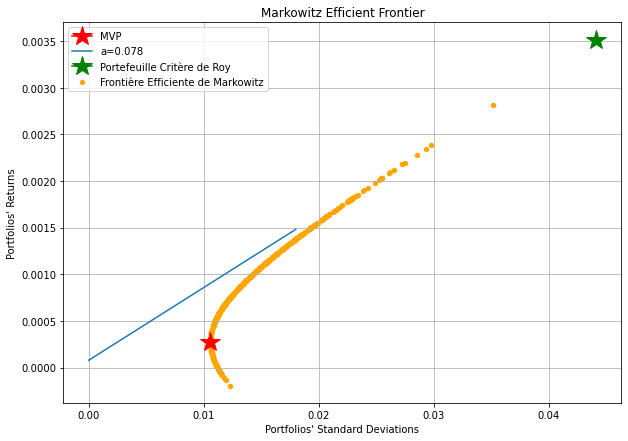

In [37]:
# ------------------ Parameters ------------------ 
nb_of_assets = len(returns_div.columns)
number_of_simulations = 500
Rmin = (1 + 0.02)**(1/255) - 1

# ------------------ Portefeuille de variance minimale ------------------
portfolio_optimized_returns, portfolio_optimized_stds, portfolio_optimized_allocations, tangente = analyse_moyenne_variance_risked_with_Roy_criteria(returns_div, var_div_returns, nb_of_assets, number_of_simulations, Rmin)
mvp_std = np.min(portfolio_optimized_stds)
index_mvp_std = portfolio_optimized_stds.index(mvp_std)
mvp_return =  portfolio_optimized_returns[index_mvp_std]
mvp_allocation = portfolio_optimized_allocations[index_mvp_std]

print(" --- MVP --- ")
print("MVP Return: ", mvp_return)
print("MVP Std: ", mvp_std)
print("MVP Allocation: ", 100*mvp_allocation)


# ------------------// Graphes //------------------
plt.figure(figsize=(10, 7))

# ------------------ Fronti√®re efficiente ------------------
plt.scatter(portfolio_optimized_stds, portfolio_optimized_returns, color="orange", marker="o", s=19, label="Fronti√®re Efficiente de Markowitz")

# ------------------ MVP ------------------
plt.plot(mvp_std, mvp_return, label = "MVP", marker="*", color="red", markersize=20)

# ------------------ Portefeuille Crit√®re de Roy ------------------
sigmas, Rp = [0, 0.018], []
print("\n --- Crit√®re de Roy --- ")
print("Rentabilit√© minimale:", Rmin)
print("Pente:", tangente[0])
print("Rendement:", tangente[2])
print("Volatilti√©:", tangente[1])
print("Allocation:", tangente[3])
for sigma in sigmas:
    Rp.append(tangente[0] * sigma + Rmin)
plt.plot(sigmas, Rp, label="a=%.3f" % tangente[0])
plt.plot(tangente[1], tangente[2], label="Portefeuille Crit√®re de Roy", marker = "*", markersize=20, color="green")

# ------------------ Config ------------------
plt.title("Markowitz Efficient Frontier")
plt.xlabel("Portfolios' Standard Deviations")
plt.ylabel("Portfolios' Returns")
plt.grid()
plt.legend()

#### Crit√®re de Tesler

Le crit√®re de Tesler propose de choisir le portefeuille avec le plus de rendement parmi ceux qui satisfont la contrainte de protection.

$$
P(Rp < Rmin) < \epsilon
$$

Cette contrainte de protection indique que la probabilit√© que le rendement du portefeuille soit inf√©rieur √† Rmin soit plafonn√©e √† un certain \epsilon. Cette contrainte de protection augment√©e permet une plus grande flexibilit√© sur le choix du portefeuille.

Les hypoth√®ses appliqu√©s au crit√®re de Roy sont toujours valables (vecteur Rendement suit une loi normale multivari√©e). Ainsi, nous avons toujours:

$$
P(Rp < Rmin) < \epsilon \\
\Leftrightarrow P(\frac{R_p - \bar{R_p}}{\sigma(R_p)} < \frac{R_{min} - \bar{R_p}}{\sigma(R_p)}) < \epsilon
$$

Or, dans l'hypoth√®se d'une loi normale multivari√©e cette expression pr√©c√©dente est √©quivalente √†:

$$
\frac{R_{min} - \bar{R_p}}{\sigma(R_p)} < x_\epsilon
$$

O√π $x_\epsilon$ repr√©sente le quantile de la loi gaussienne centr√©e et r√©duite au niveau de $\epsilon$

Ainsi, que l'ensemble des portefeuilles r√©pondant √† ce crit√®re sont ceux qui dans le plan rendement ecart-type sont au dessus de la droite d'√©quation: $$ Rmin - x_\epsilon \cdot \sigma(R_p) $$

Prenons par exemple un epsilon √† 5%, ce qui nous permettrait d'identifier les portefeuilles dont la probabilit√© de rendement inf√©rieur √† un certain rendement minimal soit inf√©rieur √† 5%. Ainsi, la table de la loi normale centr√©e r√©duit nous indique qu'il y a moins de 5% de chance que la variable al√©atoire soit inf√©rieur √† -1.65. Ainsi, on a

$$
P(\frac{R_p - \bar{R_p}}{\sigma(R_p)} < \frac{R_{min} - \bar{R_p}}{\sigma(R_p)}) < 0.05 \\
\Leftrightarrow \frac{R_{min} - \bar{R_p}}{\sigma(R_p)} < -1.65 \\
\Leftrightarrow \bar{R_p} > Rmin + (-1.65) \cdot \sigma(R_p)
$$

<u> Conclusion </u>
Le crit√®re de Tesler revient √† ecrire un probl√®me d'optimisation sous la forme:

$$
Max (R_p) \\
s.c. P(R_p < R_{min}) < \epsilon
$$